In [19]:
import pandas as pd
df = pd.read_csv(r"C:\Users\AVANISH SINGH\OneDrive\Desktop\Excel_machine\data.csv")


In [20]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


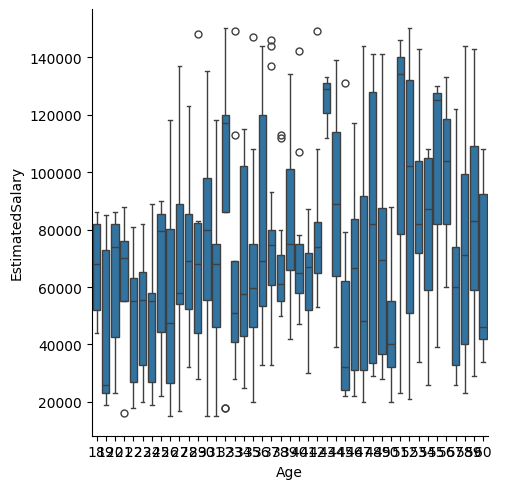

In [32]:
# plot the boxplot to check for outliers
import seaborn as sns
sns.catplot(x='Age', y='EstimatedSalary', data=df, kind='box')

In [22]:
x= df[['Age','EstimatedSalary']]
y = df[['Purchased']]

In [23]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## StandardScaler


💡 What is StandardScaler?
Imagine you and your friend are in a race:

You’re running 100 meters

Your friend is running 1 kilometer

Even if you both run fast, your friend’s numbers will look bigger just because the unit is bigger.

👉 This is not fair!

StandardScaler makes sure everyone runs on the same scale, like converting both races to the same track size.

🎯 Why we use it?
Some machine learning models get confused when one column has big numbers and another has small numbers.

Example:

Age	Salary
25	50,000
45	1,00,000

"Salary" has big values

"Age" has small values
👉 The model focuses too much on Salary and ignores Age.

✅ StandardScaler fixes this by making both columns have values like:

Age (scaled)	Salary (scaled)
-1.2	-0.8
1.2	0.8

Now the model treats both columns equally!

🛠️ When to use it?
Use StandardScaler when you're using models like:

✅ Linear Regression
✅ KNN (K-Nearest Neighbors)
✅ SVM
✅ Neural Networks

## MinMaxScaler

💡 What is MinMaxScaler?
Think of MinMaxScaler like adjusting the brightness of a photo.
It resizes your data to fit between 0 and 1 (or any range you want).

📊 Example Before Scaling:
Marks (out of 100)	Experience (in years)
50	1
80	10
100	20

👉 Look! "Experience" has much bigger numbers than "Marks" — this can confuse some ML models.

🚀 After MinMax Scaling:
All values are now between 0 and 1:

Marks (scaled)	Experience (scaled)
0.0	0.0
0.6	0.45
1.0	1.0

🧮 How it works (Formula):
scaled value
=
𝑥
−
min
max
−
min
scaled value= 
max−min
x−min
​
 
𝑥
x = your original value

min = smallest value in column

max = largest value in column

✅ Result = always between 0 and 1

✅ When to use MinMaxScaler?
Use it when:

You want to bring all values between 0 and 1

Your data doesn't have extreme outliers

You're using models like:

KNN

SVM

Neural Networks

Logistic Regression

<!-- 🧠 Easy Summary:
Concept	MinMaxScaler	StandardScaler
Outliers present	❌ Bad (gets stretched)	✅ Better (more stable)
No outliers, clean data	✅ Good	✅ Also good -->

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)


In [25]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train_scaledm = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(x_train, y_train)

c:\Users\AVANISH SINGH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_pred = model.predict(x_test_scaled)
y_pred

c:\Users\AVANISH SINGH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
predictions = model.predict(x_test)
predictions

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy*100

88.75